## SVM implementation using Pegasos
### Formulating SVM as unconstrained optimization problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

(400, 2) (400,)


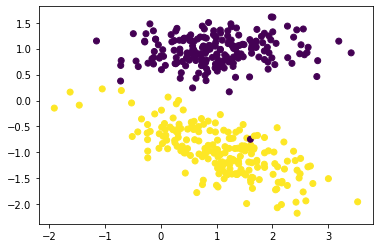

In [2]:
# Generate dataset
X, y = make_classification(n_samples=400, n_features=2, n_informative=2,
            n_redundant=0, n_clusters_per_class=1, random_state=3)

# SVM uses Labels {1, -1}
y[y==0] = -1

print(X.shape, y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [3]:
class SVM:
    
    def __init__(self, C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
    
    def hingeLoss(self, X, y):
        W, b, C = self.W, self.b, self.C
        loss = 0.5*np.dot(W, W.T)
        
        m = X.shape[0]
        for i in range(m):
            t = y[i]*(np.dot(W, X[i].T) + b)
            loss += C*max(0, (1-t))
        
        return loss[0][0]
    
    def fit(self, X, y, max_itr=200, batch_size=64, l_rate=0.001):
        m, n = X.shape
        C = self.C
        
        # Init the model parameters
        W = np.zeros((1, n))
        b = 0
        self.W, self.b = W, b
        
        # Training using weight and bias update rule
        loss = []
        for i in range(max_itr):
            
            l = self.hingeLoss(X, y)
            loss.append(l)
            
            ids = np.arange(m)
            np.random.shuffle(ids)
            
            # Batch Grad. descent with random shuffling
            for batch_start in range(0, m, batch_size):
                gradw = 0
                gradb = 0
                
                # Iterate over mini-batch
                for j in range(batch_start, batch_start+batch_size):
                    if j < m:
                        idx = ids[j]
                        t = y[idx]*(np.dot(W, X[idx].T) + b)
                        
                        if t <= 1:
                            gradw += C*y[idx]*X[idx]
                            gradb += C*y[idx]
                
                # Update gradient for the batch
                W = W - l_rate*W + l_rate*gradw
                b = b + l_rate*gradb
                
            self.W, self.b = W, b
        
        return W[0], b, loss

In [4]:
svc = SVM()
Wt, bias, loss = svc.fit(X, y, max_itr=100)

print(Wt, bias)

[-0.26586337 -1.87268527] 0.3080000000000002


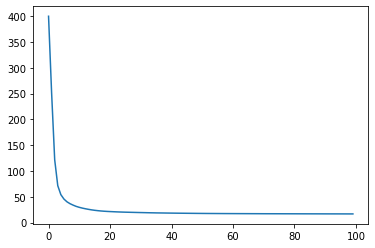

In [5]:
# Reduction of hinge loss over time

plt.plot(loss)
plt.show()

In [6]:
# Visualizing hyperplanes

def plotHyperplane(w1, w2, b, X, y):
    x = np.linspace(X.min(), X.max(), 20)
    
    # Hyperplane W.X + b = 0
    h0 = -(w1*x + b)/w2
    
    # Neg hyperplane W.X + b = -1
    h1 = -(w1*x + b + 1)/w2
    
    # Pos Hyperplane W.X + b = 1
    h2 = -(w1*x + b - 1)/w2
    
    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.plot(x, h0, label='hyperplane')
    plt.plot(x, h1, linestyle='dashed', label='-ve hyperplane')
    plt.plot(x, h2, linestyle='dashed', label='+ve hyperplane')
    plt.legend()
    plt.show()

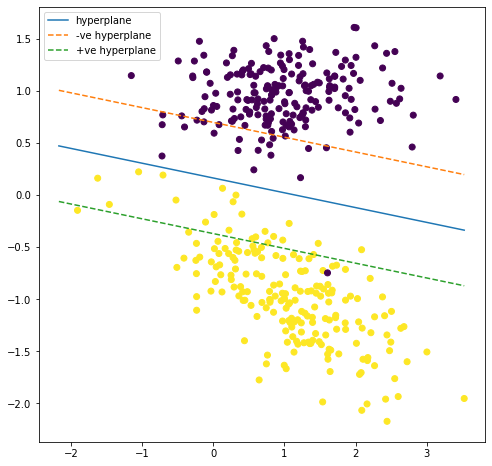

In [7]:
plotHyperplane(Wt[0], Wt[1], bias, X, y)

## Effect of penalty constant

[-0.67326908 -3.04572292] 0.73


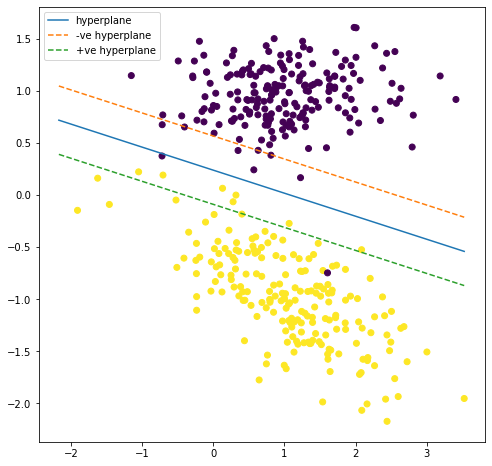

[-2.12871907 -6.89373592] 2.0


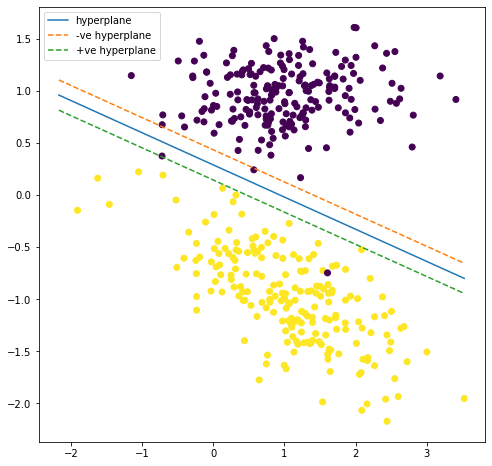

In [8]:
# For penalty constant C = 10
svc = SVM(C=10)
Wt, bias, loss = svc.fit(X, y, max_itr=100)
print(Wt, bias)

plotHyperplane(Wt[0], Wt[1], bias, X, y)

# For penalty constant C = 500
svc = SVM(C=500)
Wt, bias, loss = svc.fit(X, y, max_itr=100)
print(Wt, bias)

plotHyperplane(Wt[0], Wt[1], bias, X, y)